<a href="https://colab.research.google.com/github/gtanmay123/Assignment/blob/main/Family_Expenditure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [39]:
!pip install fastapi nest-asyncio pyngrok uvicorn

In [ ]:
df=pd.read_excel('/content/family_financial_and_transactions_data.xlsx')

In [ ]:
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


In [ ]:
df.isnull()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,False,False,False,False,False,False,False,False,False,False,False,False
16302,False,False,False,False,False,False,False,False,False,False,False,False
16303,False,False,False,False,False,False,False,False,False,False,False,False
16304,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,Transaction Date,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000,16306.000000
mean,2024-10-16 00:34:31.777259776,256.368534,90340.503925,24473.998038,3948.522384,2529.978965,1782.880535,3.201521,59.418006
min,2024-10-01 00:00:00,10.030000,30851.000000,1037.000000,1013.000000,3.000000,510.000000,0.000000,21.000000
25%,2024-10-08 00:00:00,134.820000,59871.000000,11016.000000,2582.000000,1390.000000,1221.000000,2.000000,37.000000
50%,2024-10-16 00:00:00,256.055000,90142.000000,25504.000000,3721.000000,2548.000000,1705.000000,3.000000,58.000000
75%,2024-10-24 00:00:00,379.240000,119733.000000,37422.000000,5450.000000,3724.000000,2422.000000,4.000000,79.000000
max,2024-10-31 00:00:00,499.910000,149871.000000,49217.000000,6968.000000,4974.000000,2999.000000,5.000000,100.000000
std,NaN,141.153813,34740.834136,14828.955695,1689.987801,1384.105561,716.595101,1.468880,23.444304


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Family ID                16306 non-null  object        
 1   Member ID                16306 non-null  object        
 2   Transaction Date         16306 non-null  datetime64[ns]
 3   Category                 16306 non-null  object        
 4   Amount                   16306 non-null  float64       
 5   Income                   16306 non-null  int64         
 6   Savings                  16306 non-null  int64         
 7   Monthly Expenses         16306 non-null  int64         
 8   Loan Payments            16306 non-null  int64         
 9   Credit Card Spending     16306 non-null  int64         
 10  Dependents               16306 non-null  int64         
 11  Financial Goals Met (%)  16306 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
financial_data = pd.read_csv('/content/family_financial.csv')

# Family-level summary
family_summary = financial_data.groupby('Family ID').agg({
    'Amount': 'sum',
    'Income': 'mean',
    'Savings': 'mean',
    'Monthly Expenses': 'mean',
    'Loan Payments': 'mean',
    'Credit Card Spending': 'mean',
    'Financial Goals Met (%)': 'mean'
}).reset_index()

# Member-level summary
member_summary = financial_data.groupby('Member ID').agg({
    'Amount': 'sum',
    'Income': 'mean',
    'Savings': 'mean',
    'Monthly Expenses': 'mean',
    'Loan Payments': 'mean',
    'Credit Card Spending': 'mean',
    'Financial Goals Met (%)': 'mean'
}).reset_index()




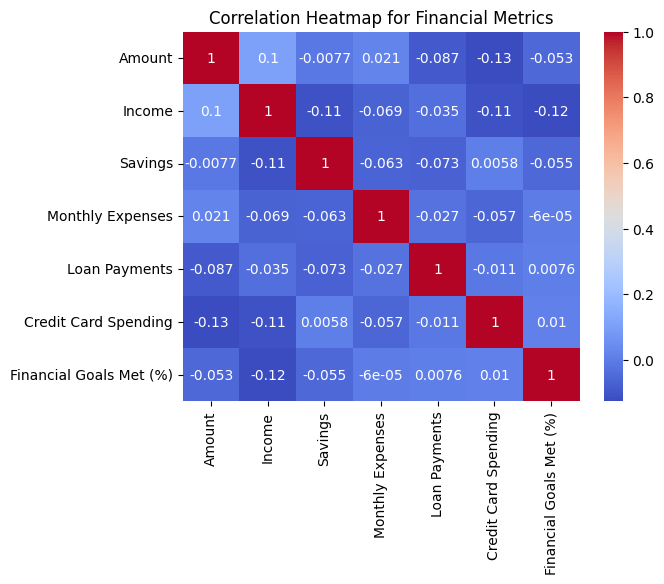

In [ ]:
# Correlation analysis (family-level)
correlations = family_summary.drop(columns=['Family ID']).corr() # Drop the 'Family ID' column
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Financial Metrics')
plt.show()

In [1]:
import pandas as pd

# Load the uploaded Excel file to examine its contents
file_path = '/family_financial_and_transactions_data.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
excel_data.sheet_names


['final_family_financial_and_tran']

In [2]:
# Load the data from the sheet to preview its structure and contents
sheet_name = 'final_family_financial_and_tran'
data = excel_data.parse(sheet_name)

# Display the first few rows of the dataset to understand its structure
data.head()


,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


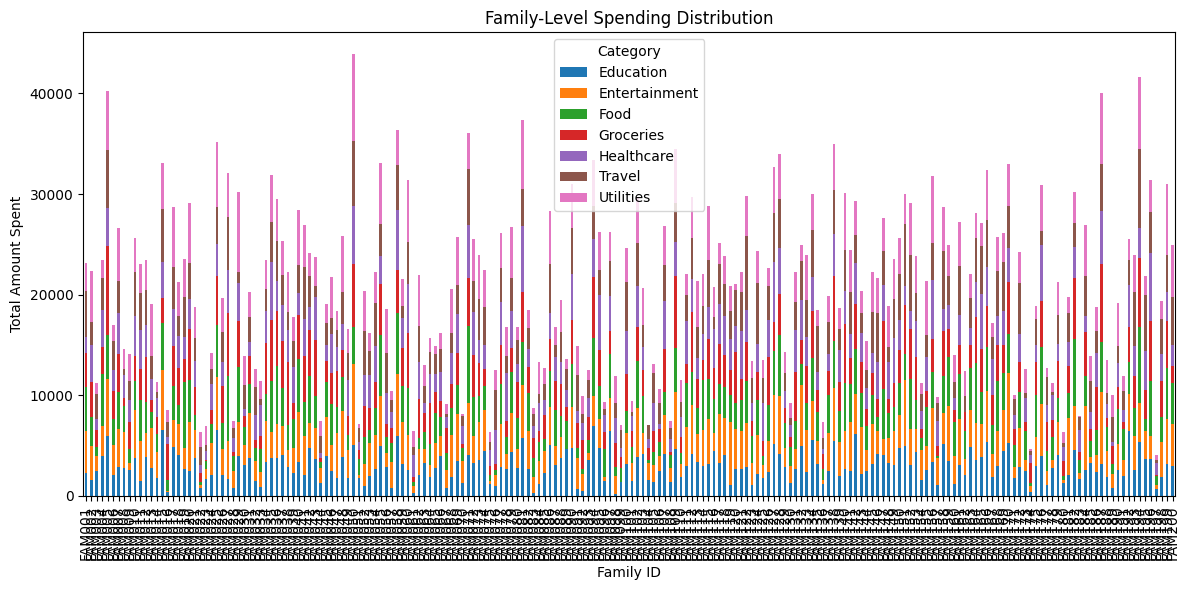

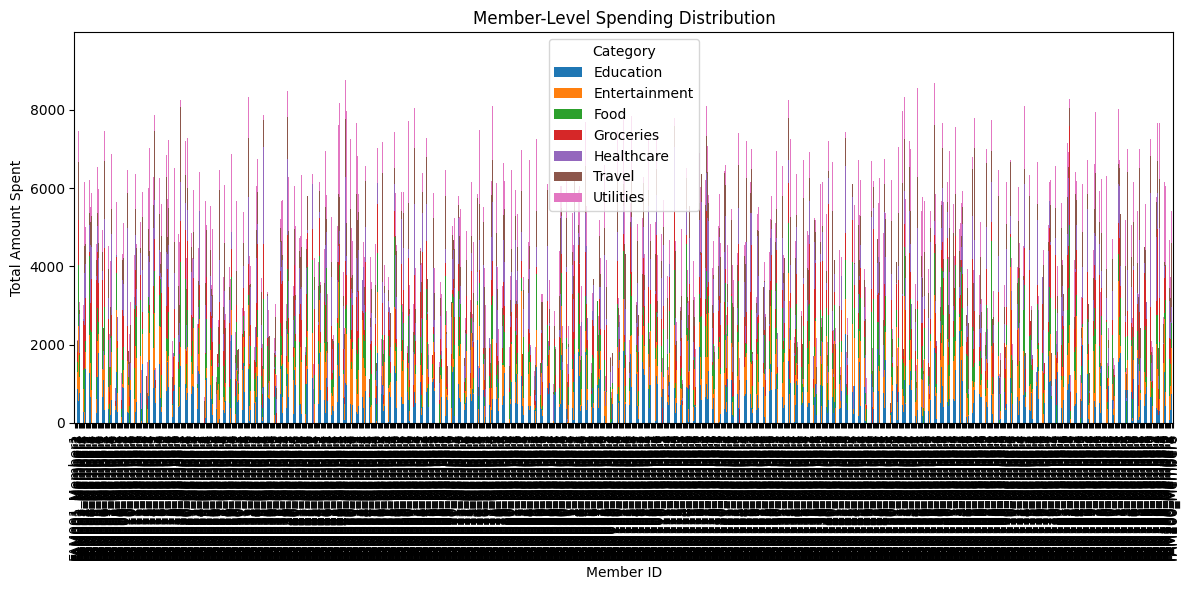

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Family ID and Category to calculate total spending by family
family_spending = data.groupby(['Family ID', 'Category'])['Amount'].sum().unstack()

# Visualize family-level spending distribution
family_spending.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Family-Level Spending Distribution")
plt.ylabel("Total Amount Spent")
plt.xlabel("Family ID")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

# Member-level spending trends
member_spending = data.groupby(['Member ID', 'Category'])['Amount'].sum().unstack()
member_spending.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Member-Level Spending Distribution")
plt.ylabel("Total Amount Spent")
plt.xlabel("Member ID")
plt.legend(title="Category")
plt.tight_layout()
plt.show()


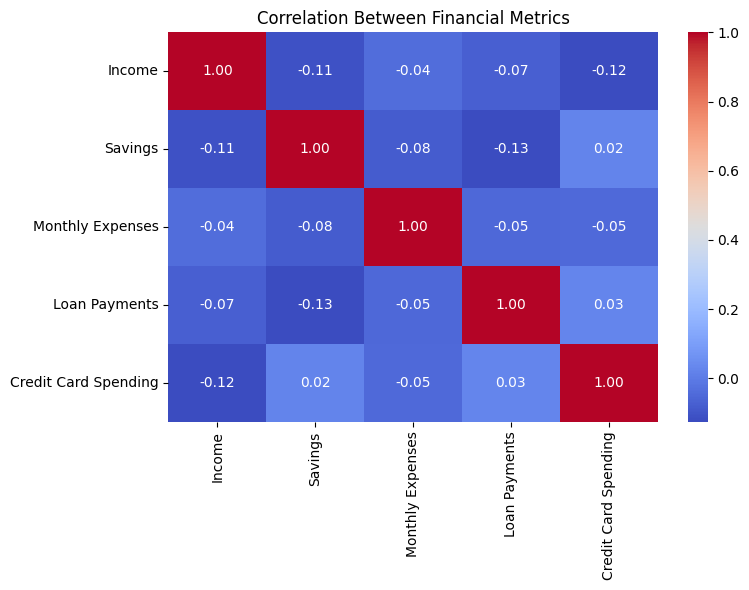

In [4]:
# Select financial metrics for correlation analysis
financial_metrics = data[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']]
correlation_matrix = financial_metrics.corr()

# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Financial Metrics")
plt.tight_layout()
plt.show()


Build Financial Scoring Model

In [5]:
def calculate_financial_score(row):
    # Define weights for scoring
    weights = {
        'Savings-to-Income Ratio': 0.25,
        'Monthly Expenses % of Income': 0.25,
        'Loan Payments % of Income': 0.20,
        'Credit Card Spending % of Income': 0.15,
        'Financial Goals Met %': 0.15,
    }

    # Calculate individual components
    savings_to_income = row['Savings'] / row['Income']
    expenses_ratio = row['Monthly Expenses'] / row['Income']
    loan_ratio = row['Loan Payments'] / row['Income']
    credit_card_ratio = row['Credit Card Spending'] / row['Income']
    goals_met = row['Financial Goals Met (%)'] / 100

    # Normalize and calculate score
    score = (
        weights['Savings-to-Income Ratio'] * min(savings_to_income, 1) +
        weights['Monthly Expenses % of Income'] * (1 - min(expenses_ratio, 1)) +
        weights['Loan Payments % of Income'] * (1 - min(loan_ratio, 1)) +
        weights['Credit Card Spending % of Income'] * (1 - min(credit_card_ratio, 1)) +
        weights['Financial Goals Met %'] * goals_met
    ) * 100

    return score

# Apply scoring model to each family
data['Financial Score'] = data.apply(calculate_financial_score, axis=1)

# Average financial score per family
family_scores = data.groupby('Family ID')['Financial Score'].mean()
print(family_scores)


Family ID
FAM001    72.559195
FAM002    80.006571
FAM003    77.673388
FAM004    77.309277
FAM005    71.142363
            ...    
FAM196    63.564091
FAM197    75.139905
FAM198    67.514137
FAM199    72.898827
FAM200    94.031729
Name: Financial Score, Length: 200, dtype: float64


Insight Visualization

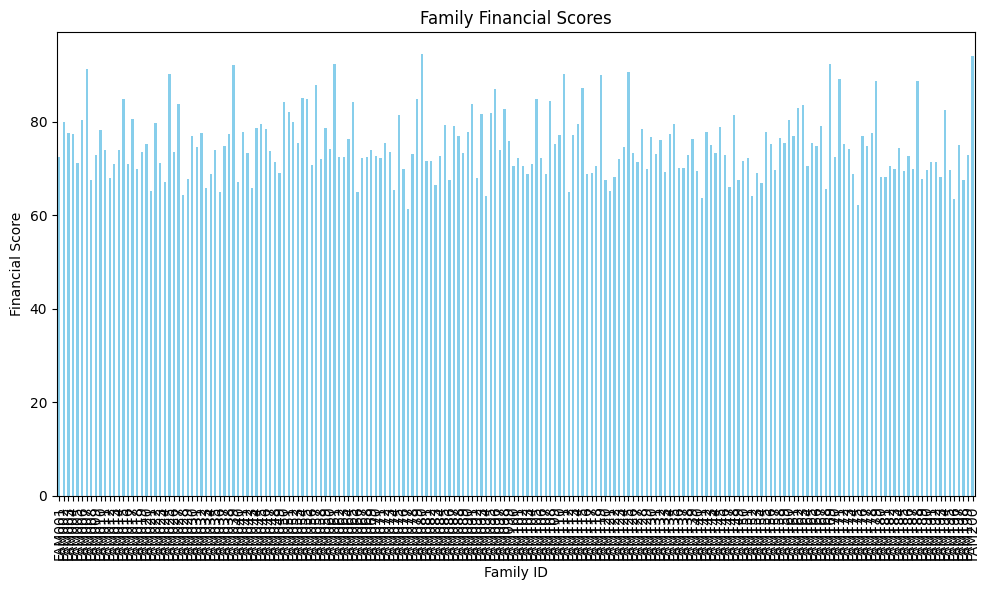

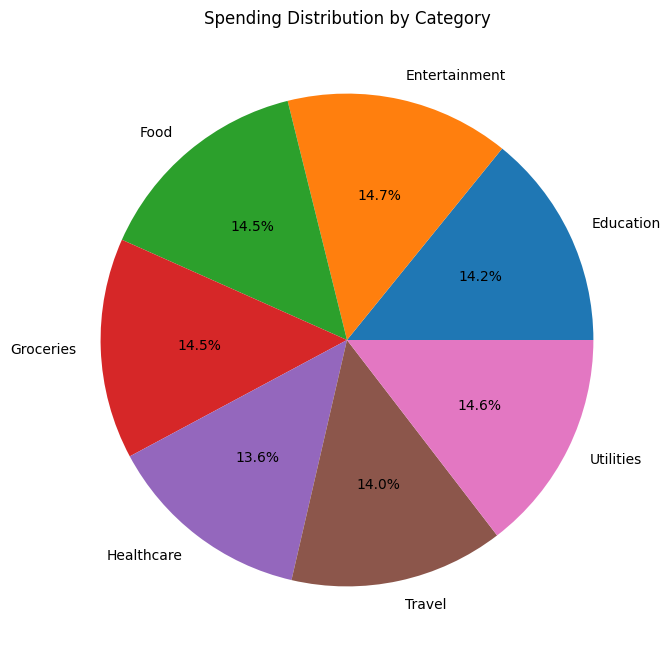

<ipython-input-9-d7a33c0f5438>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


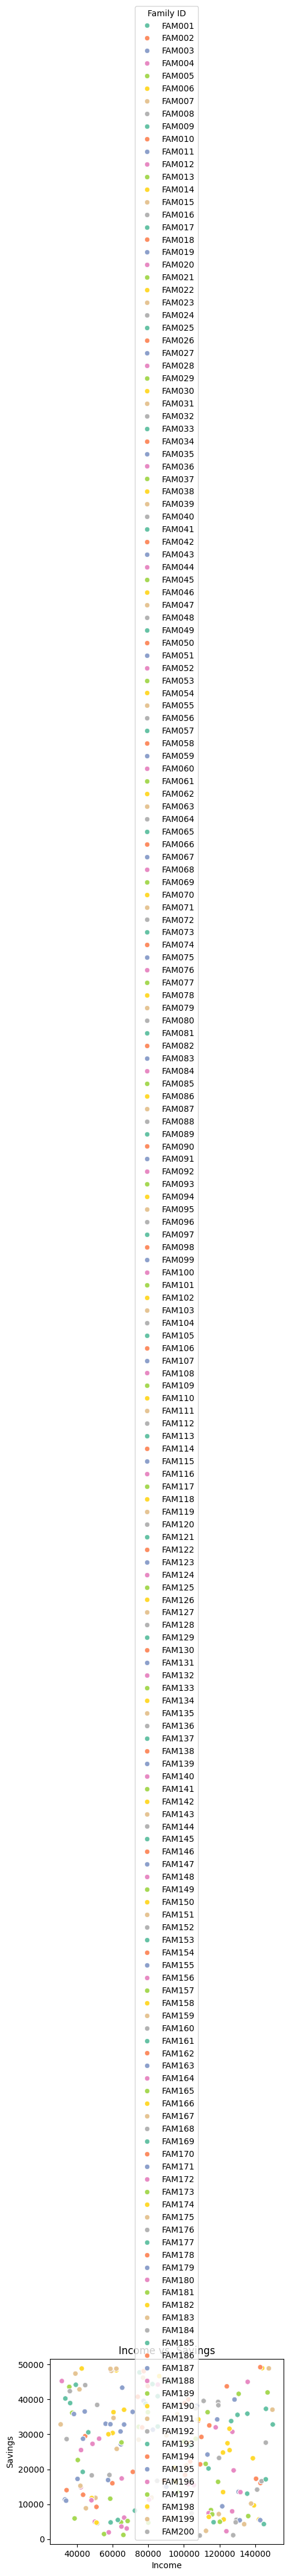

In [9]:
# Visualization of Financial Scores
family_scores.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Family Financial Scores")
plt.ylabel("Financial Score")
plt.xlabel("Family ID")
plt.tight_layout()
plt.show()

# Spending distribution by category
category_spending = data.groupby('Category')['Amount'].sum()
category_spending.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Spending Distribution by Category")
plt.ylabel("")
plt.show()

# Scatter plot: Income vs Savings
plt.figure(figsize=(5, 4))
sns.scatterplot(x=data['Income'], y=data['Savings'], hue=data['Family ID'], palette="Set2")
plt.title("Income vs. Savings")
plt.xlabel("Income")
plt.ylabel("Savings")
plt.tight_layout()
plt.show()


In [11]:
!pip install flask flask-ngrok

In [19]:
!pip install --upgrade pyngrok

In [20]:
!ngrok authtoken YOUR_AUTHTOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [24]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz -O ngrok.tgz
!tar -xvzf ngrok.tgz
!mv ngrok /usr/bin


--2024-11-24 17:45:02--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 75.2.60.68, 35.71.179.82, 99.83.220.108, ...
Connecting to bin.equinox.io (bin.equinox.io)|75.2.60.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14796857 (14M) [application/octet-stream]
Saving to: ‘ngrok.tgz’

ngrok.tgz           100%[===================>]  14.11M  30.6MB/s    in 0.5s    

2024-11-24 17:45:03 (30.6 MB/s) - ‘ngrok.tgz’ saved [14796857/14796857]

ngrok


In [25]:
!ngrok authtoken YOUR_AUTH_TOKEN


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [31]:
!pip install flask-ngrok


In [33]:
pip install fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.5 MB/s eta 0:00:00


In [40]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List, Dict
from fastapi.middleware.cors import CORSMiddleware

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=['*'],
    allow_credentials=True,
    allow_methods=['*'],
    allow_headers=['*'],
)

# Define input data structure
class TransactionData(BaseModel):
    category: str
    amount: float

class FamilyData(BaseModel):
    family_id: str
    monthly_income: float
    monthly_savings: float
    loan_payments: float
    credit_card_spending: float
    spending_distribution: Dict[str, float]  # e.g., {"groceries": 800, "travel": 300}
    financial_goals_met: float               # Percentage of goals met, e.g., 0.7 for 70%
    transactions: List[TransactionData]      # List of individual transactions

# Scoring logic function
def calculate_financial_score(data: FamilyData) -> Dict[str, str | float]:
    # Calculating key financial metrics
    savings_to_income_ratio = data.monthly_savings / data.monthly_income
    expenses_to_income_ratio = (
        sum(data.spending_distribution.values()) + data.loan_payments
    ) / data.monthly_income
    credit_card_ratio = data.credit_card_spending / data.monthly_income

    # Compute financial score (example scoring logic)
    financial_score = max(
        0,
        min(
            100,
            50 * savings_to_income_ratio
            - 30 * expenses_to_income_ratio
            - 10 * credit_card_ratio
            + 20 * data.financial_goals_met,
        ),
    )

    # Generate insights
    insights = f"Savings are at {savings_to_income_ratio:.2%} of your income. "
    if expenses_to_income_ratio > 0.5:
        insights += "Expenses are above 50% of your income, reducing your score. "
    if savings_to_income_ratio < 0.2:
        insights += "Consider increasing savings to improve your score. "

    return {
        "family_id": data.family_id,
        "financial_score": round(financial_score, 2),
        "insights": insights.strip(),
    }

# Define the API route
@app.post("/calculate-score/")
def get_financial_score(family_data: FamilyData):
    """
    Input:
    - Family-level and transaction data
    Output:
    - Financial score and key insights
    """
    return calculate_financial_score(family_data)

# Example route to check if the API is running
@app.get("/")
def root():
    return {"message": "Financial Scoring API is running!"}


In [ ]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn

auth_token = "2pJEWsCtsnZSM3oLrr4NtgDykh0_4LKoQAKYrQ7wA5puQdMwS"
ngrok.set_auth_token(auth_token)

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

INFO:     Started server process [176]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Public URL: https://0ff6-35-203-175-205.ngrok-free.app


INFO:     101.0.62.20:0 - "GET / HTTP/1.1" 200 OK
INFO:     101.0.62.20:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     101.0.62.20:0 - "GET /calculate-score HTTP/1.1" 307 Temporary Redirect
INFO:     101.0.62.20:0 - "GET /calculate-score/ HTTP/1.1" 405 Method Not Allowed
INFO:     101.0.62.20:0 - "POST /calculate-score/ HTTP/1.1" 200 OK
INFO:     101.0.62.20:0 - "GET / HTTP/1.1" 200 OK
